In [3]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Load Data

In [6]:
numeric = pd.read_csv('data/train_numeric1.csv')
numeric.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
date = pd.read_csv('data/shared_data/date/train_date1.csv')
date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
numeric_num = np.size(numeric,0)
numeric_num

49999

In [6]:
date_num = np.size(date,0)
date_num

50000

In [7]:
pd.notnull(date.iloc[1]).sum()

210

In [15]:
numeric_notnull = np.zeros(numeric_num)
for i in range(numeric_num):
    numeric_notnull[i] = pd.notnull(numeric.iloc[i]).sum()

In [8]:
date_notnull = np.zeros(date_num)
for i in range(date_num):
    date_notnull[i] = pd.notnull(date.iloc[i]).sum()

In [16]:
numeric_notnull

array([ 164.,  194.,  192., ...,  112.,  162.,  208.])

In [9]:
date_notnull

array([ 180.,  210.,  208., ...,  178.,  236.,  206.])

In [18]:
numeric_notnull.mean()

184.63475269505389

In [10]:
date_notnull.mean()

205.66309999999999

In [114]:
listp=[x for x in numeric.columns if x not in ["Id","Response"]]

In [11]:
dlistp=[x for x in date.columns if x not in ["Id","Response"]]

In [115]:
missing = pd.DataFrame(columns = ['features','missing_num', 'missing_rate'])
data_num = np.size(numeric,0)

In [12]:
dmissing = pd.DataFrame(columns = ['features','missing_num', 'missing_rate'])
ddata_num = np.size(date,0)

In [116]:
for i in listp:
    miss_num = (pd.isnull(numeric[i])).sum()
    missing.loc[len(missing)]= [i, miss_num, miss_num/data_num]

In [13]:
for i in dlistp:
    dmiss_num = (pd.isnull(date[i])).sum()
    dmissing.loc[len(dmissing)]= [i, dmiss_num, dmiss_num/ddata_num]

In [117]:
missing.loc[len(missing)] = ['mean', missing[[1]].mean()[0], missing[[2]].mean()[0]]

In [14]:
dmissing.loc[len(dmissing)] = ['mean', dmissing[[1]].mean()[0], dmissing[[2]].mean()[0]]

In [15]:
dmissing

,features,missing_num,missing_rate
0,L0_S0_D1,21145.000000,0.422900
1,L0_S0_D3,21145.000000,0.422900
2,L0_S0_D5,21145.000000,0.422900
3,L0_S0_D7,21145.000000,0.422900
4,L0_S0_D9,21145.000000,0.422900
5,L0_S0_D11,21145.000000,0.422900
6,L0_S0_D13,21145.000000,0.422900
7,L0_S0_D15,21145.000000,0.422900
8,L0_S0_D17,21145.000000,0.422900
9,L0_S0_D19,21145.000000,0.422900


In [203]:
# df =pd.DataFrame(missing['missing_rate'])
# df.hist() 
# missing.hist(by=missing['missing_rate'])


TypeError: hist() missing 1 required positional argument: 'x'

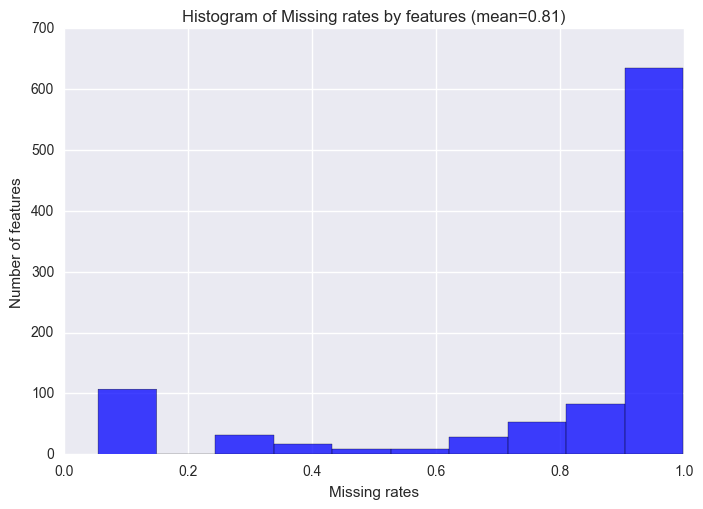

In [221]:
# the histogram of the data
n, bins, patches = plt.hist(missing['missing_rate'], 10, facecolor='blue', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Missing rates')
plt.ylabel('Number of features')
plt.title('Histogram of Missing rates by features (mean=0.81)')
#plt.title(r'$\mathrm{Histogram\ of\ Missing\ rates\ by\ features:}\ \mu=0.81$')
plt.axis([0, 1, 0, 700])
plt.grid(True)
plt.savefig('data/images/hist_missing.png', dpi=1000)
plt.show()

In [118]:
less_miss = missing[missing['missing_rate']<0.1]
less_miss_f = less_miss[['features']] 
less_miss_f.to_csv('data/less_miss_features.csv', index=False)
less_miss_f

,features
723,L3_S29_F3315
724,L3_S29_F3318
725,L3_S29_F3321
726,L3_S29_F3324
727,L3_S29_F3327
728,L3_S29_F3330
729,L3_S29_F3333
730,L3_S29_F3336
731,L3_S29_F3339
732,L3_S29_F3342


In [161]:
mask = (missing['missing_rate'] >= 0.1) & (missing['missing_rate'] < 0.5)
less_miss01_05 = missing[mask]
less_miss_f01_05 = less_miss01_05[['features']] 
less_miss_f01_05.to_csv('data/less_miss_features01_05.csv', index=False)
less_miss_f01_05

,features
0,L0_S0_F0
1,L0_S0_F2
2,L0_S0_F4
3,L0_S0_F6
4,L0_S0_F8
5,L0_S0_F10
6,L0_S0_F12
7,L0_S0_F14
8,L0_S0_F16
9,L0_S0_F18


In [ ]:
mask = ((missing['missing_rate'] >= 0.5)
less_miss01_05 = missing[mask]
less_miss_f01_05 = less_miss01_05[['features']] 
less_miss_f01_05.to_csv('data/less_miss_features01_05.csv', index=False)
less_miss_f01_05

SyntaxError: invalid syntax (<ipython-input-158-e152289aab93>, line 1)

In [90]:
missing['features'].values

array(['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8',
       'L0_S0_F10', 'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16', 'L0_S0_F18',
       'L0_S0_F20', 'L0_S0_F22', 'L0_S1_F24', 'L0_S1_F28', 'L0_S2_F32',
       'L0_S2_F36', 'L0_S2_F40', 'L0_S2_F44', 'L0_S2_F48', 'L0_S2_F52',
       'L0_S2_F56', 'L0_S2_F60', 'L0_S2_F64', 'L0_S3_F68', 'L0_S3_F72',
       'L0_S3_F76', 'L0_S3_F80', 'L0_S3_F84', 'L0_S3_F88', 'L0_S3_F92',
       'L0_S3_F96', 'L0_S3_F100', 'L0_S4_F104', 'L0_S4_F109', 'L0_S5_F114',
       'L0_S5_F116', 'L0_S6_F118', 'L0_S6_F122', 'L0_S6_F132',
       'L0_S7_F136', 'L0_S7_F138', 'L0_S7_F142', 'L0_S8_F144',
       'L0_S8_F146', 'L0_S8_F149', 'L0_S9_F155', 'L0_S9_F160',
       'L0_S9_F165', 'L0_S9_F170', 'L0_S9_F175', 'L0_S9_F180',
       'L0_S9_F185', 'L0_S9_F190', 'L0_S9_F195', 'L0_S9_F200',
       'L0_S9_F205', 'L0_S9_F210', 'L0_S10_F219', 'L0_S10_F224',
       'L0_S10_F229', 'L0_S10_F234', 'L0_S10_F239', 'L0_S10_F244',
       'L0_S10_F249', 'L0_S10_F254', 'L0_S10_F259'

In [101]:
import missingno as msno

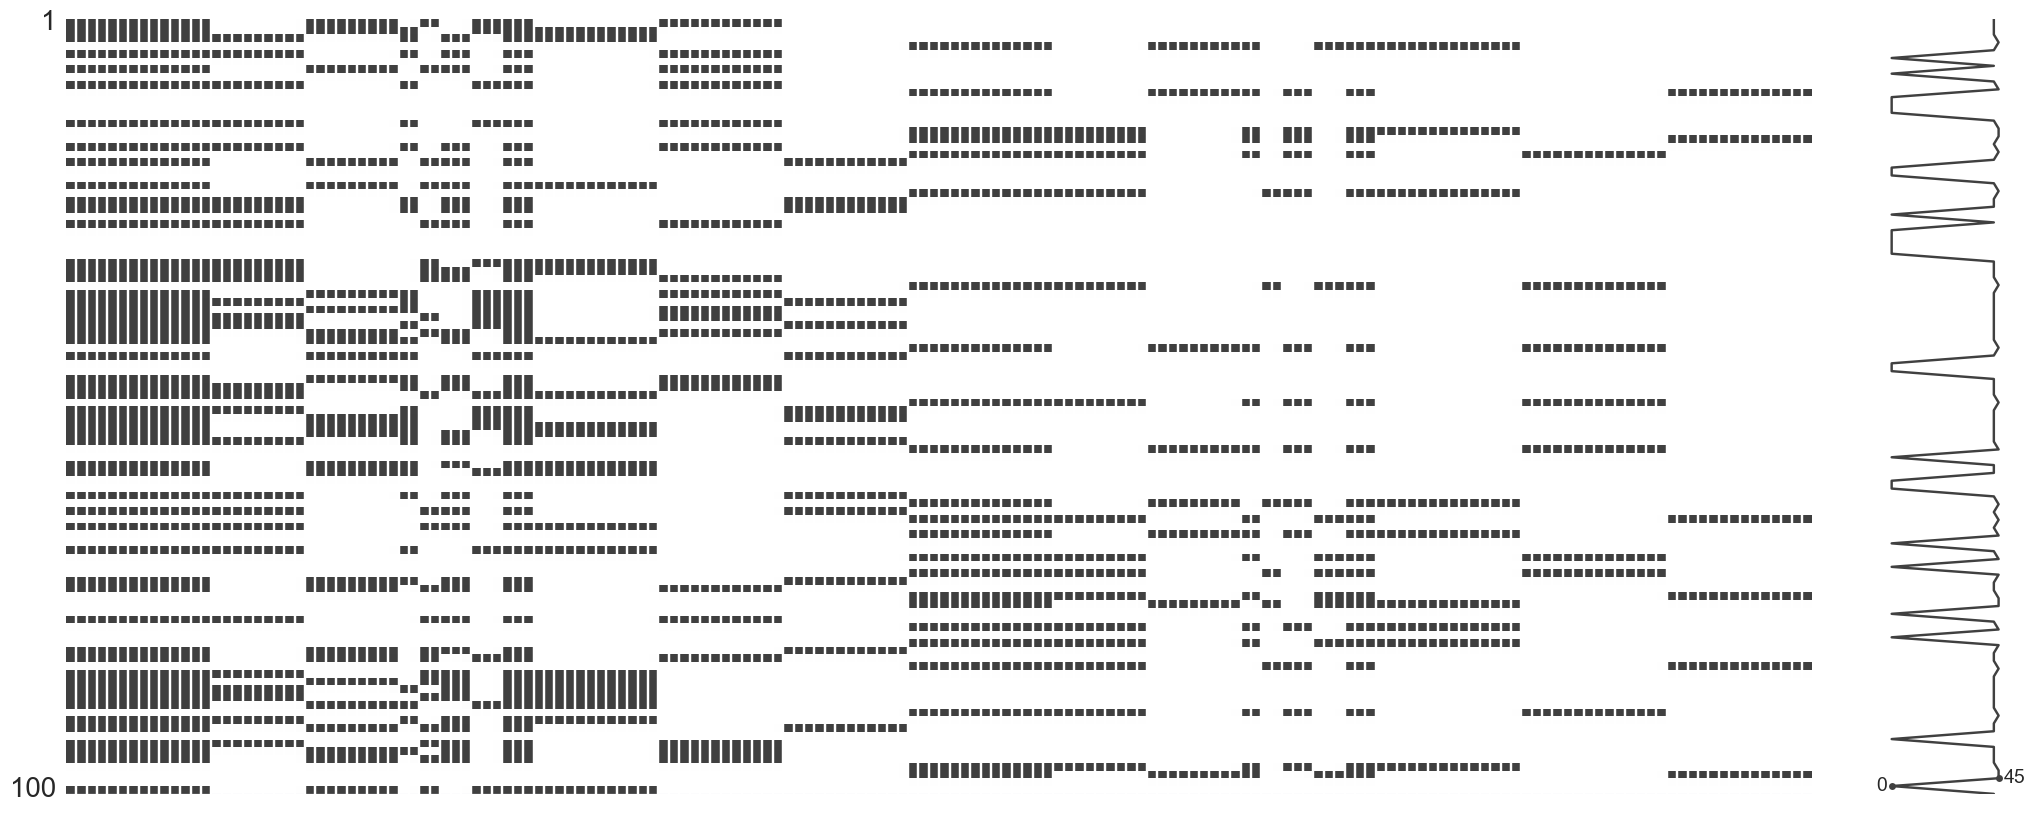

In [220]:
# L0: S0 - S23 (all the features)
msno.matrix(numeric.loc[:,'L0_S0_F0':'L0_S23_F671'].sample(100))
plt.savefig('data/images/miss_L0.png', dpi=1000)

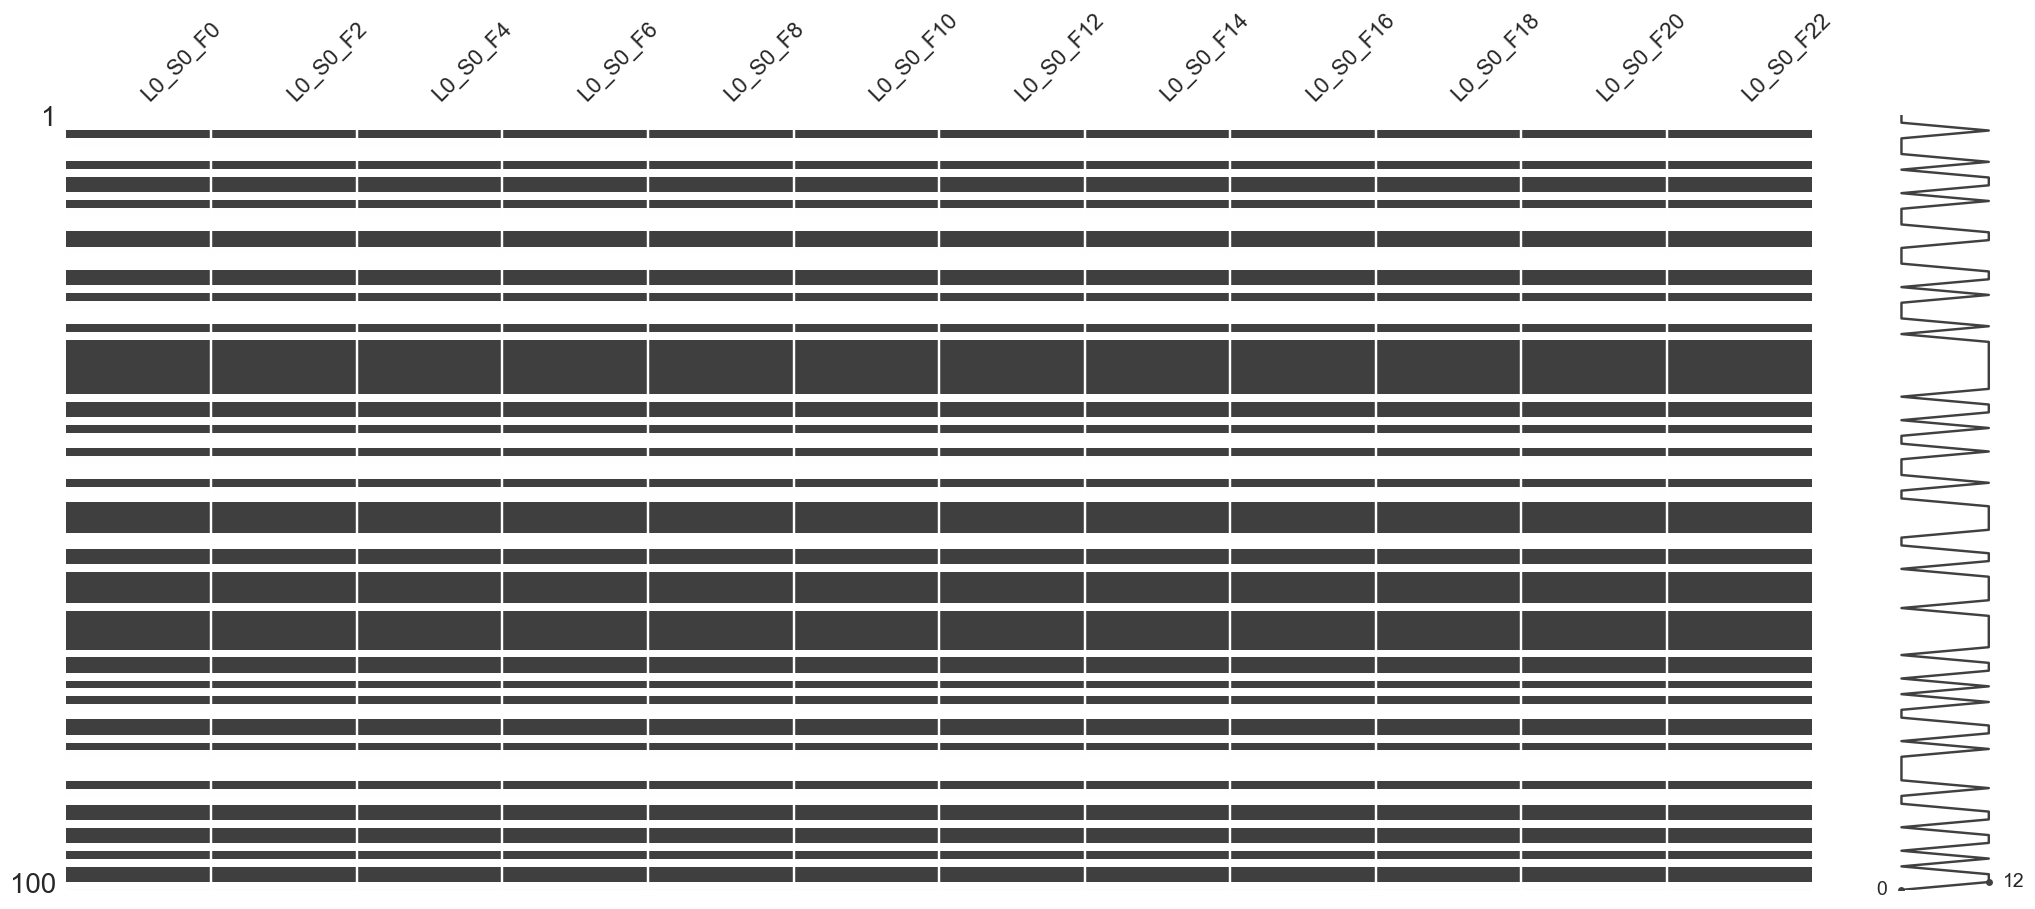

In [41]:
# L0: S1
msno.matrix(numeric.loc[:,'L0_S0_F0':'L0_S0_F22'].sample(100))

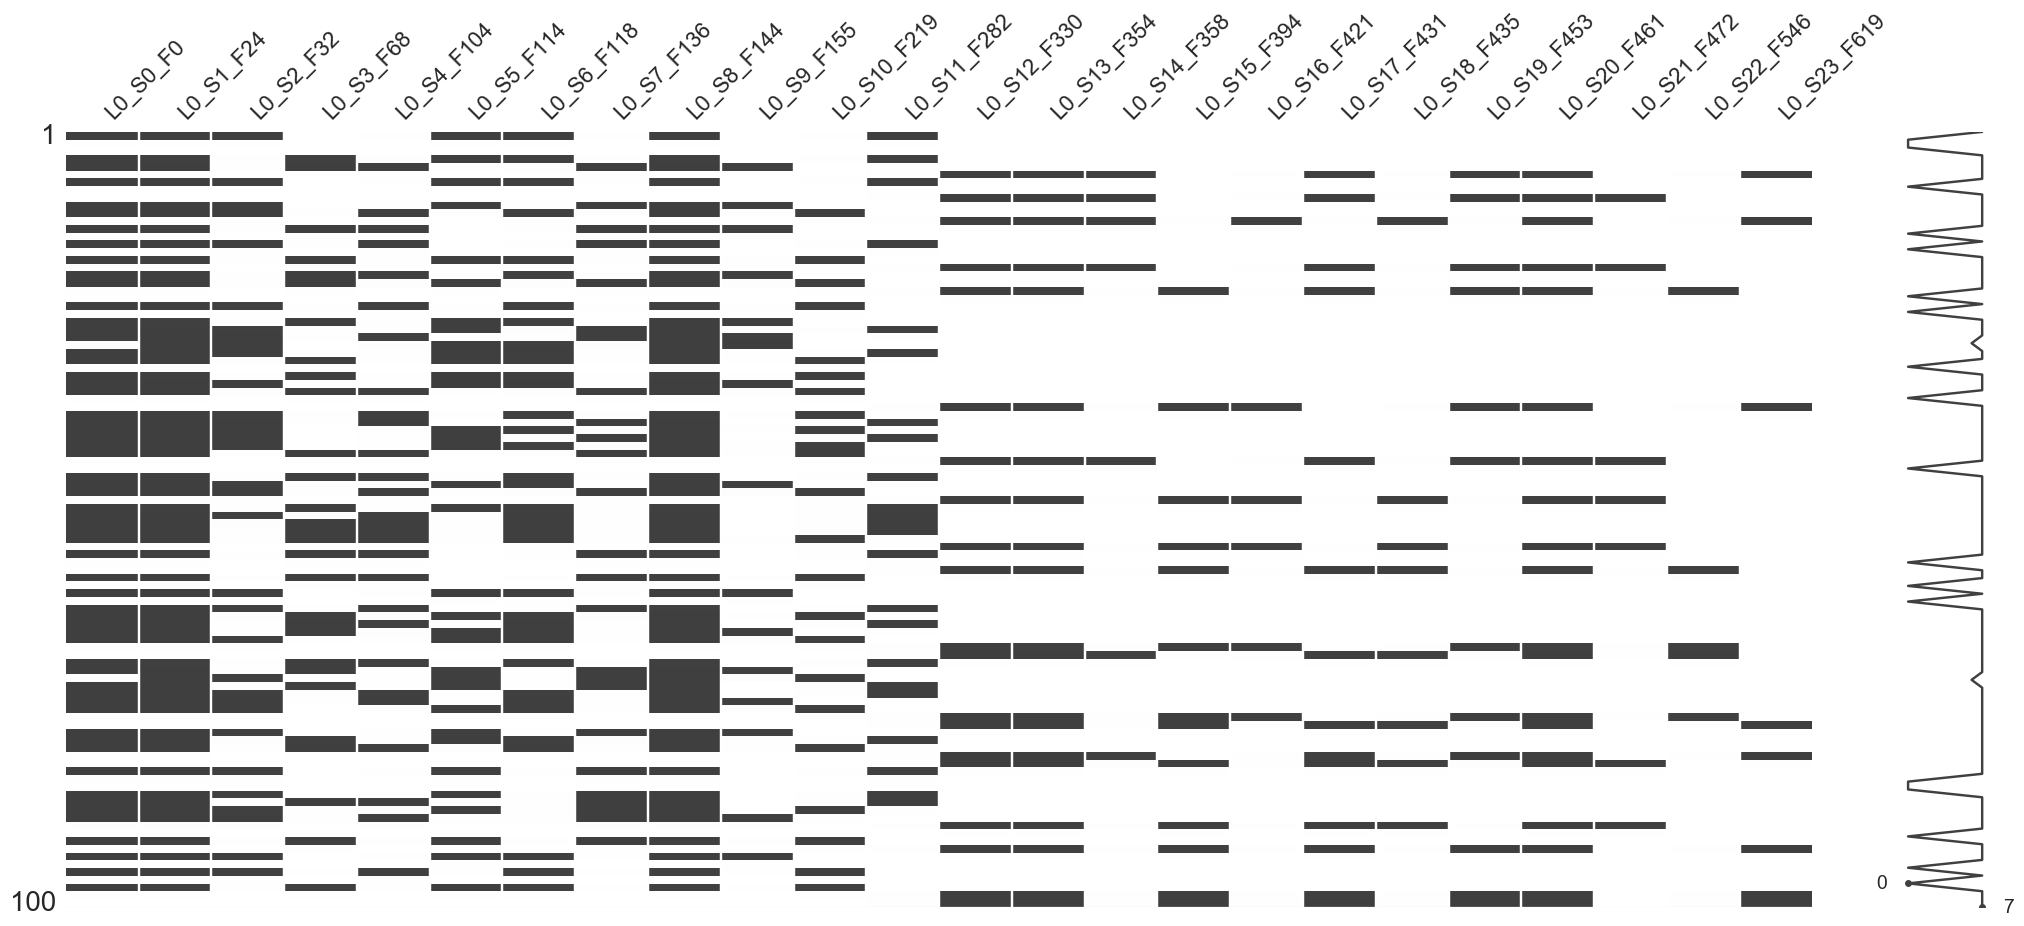

In [97]:
# L0 - first features by station
msno.matrix(numeric.loc[:,['L0_S0_F0','L0_S1_F24','L0_S2_F32','L0_S3_F68','L0_S4_F104','L0_S5_F114','L0_S6_F118','L0_S7_F136'
                      ,'L0_S8_F144','L0_S9_F155','L0_S10_F219','L0_S11_F282', 'L0_S12_F330','L0_S13_F354','L0_S14_F358'
                          ,'L0_S15_F394','L0_S16_F421','L0_S17_F431','L0_S18_F435','L0_S19_F453','L0_S20_F461','L0_S21_F472'
                          ,'L0_S22_F546','L0_S23_F619']].sample(100))

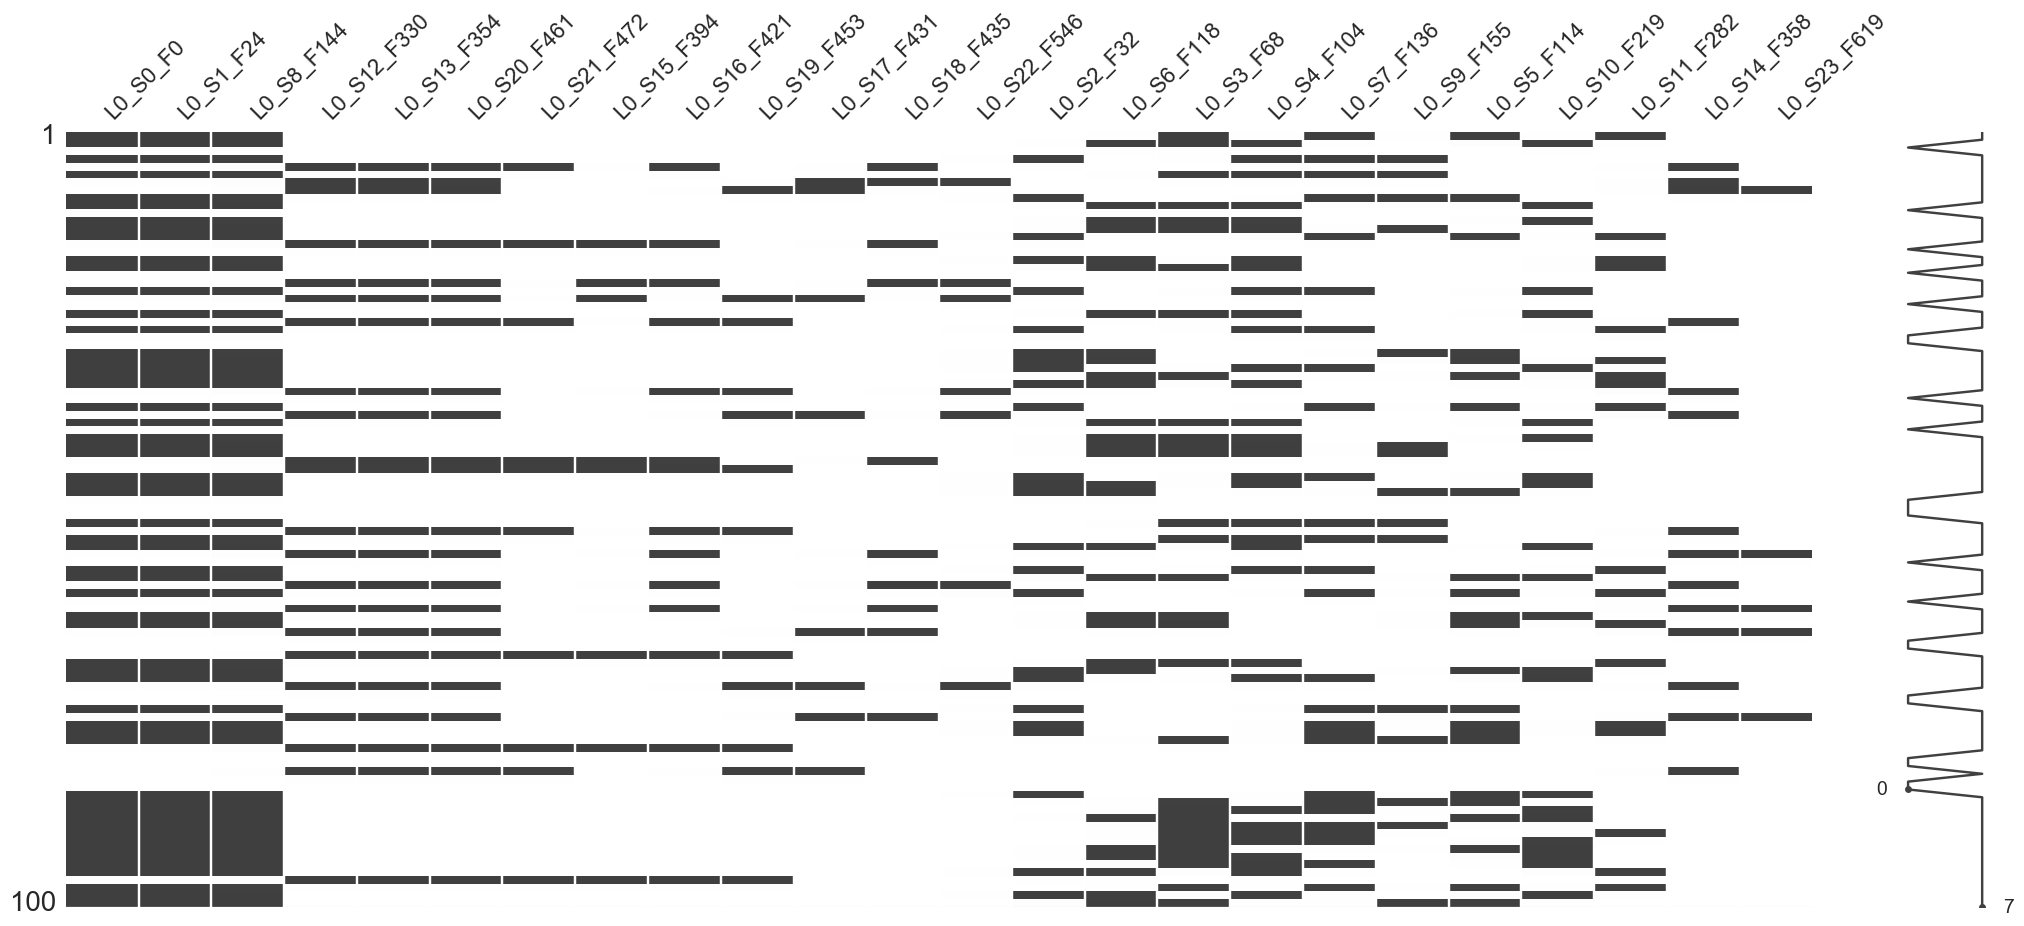

In [96]:
# L0 - fist features by station (align)
msno.matrix(numeric.loc[:,['L0_S0_F0','L0_S1_F24','L0_S8_F144','L0_S12_F330','L0_S13_F354','L0_S20_F461','L0_S21_F472',
                           'L0_S15_F394','L0_S16_F421','L0_S19_F453','L0_S17_F431','L0_S18_F435',
                           'L0_S22_F546',
                           'L0_S2_F32','L0_S6_F118','L0_S3_F68','L0_S4_F104','L0_S7_F136','L0_S9_F155','L0_S5_F114',
                           'L0_S10_F219','L0_S11_F282', 'L0_S14_F358','L0_S23_F619']].sample(100))

In [218]:
#from pylab import figure, axes, pie, title, show
fig = plt.figure()
fig.savefig('data/images/L0_1st_features.png', bbox_inches='tight')

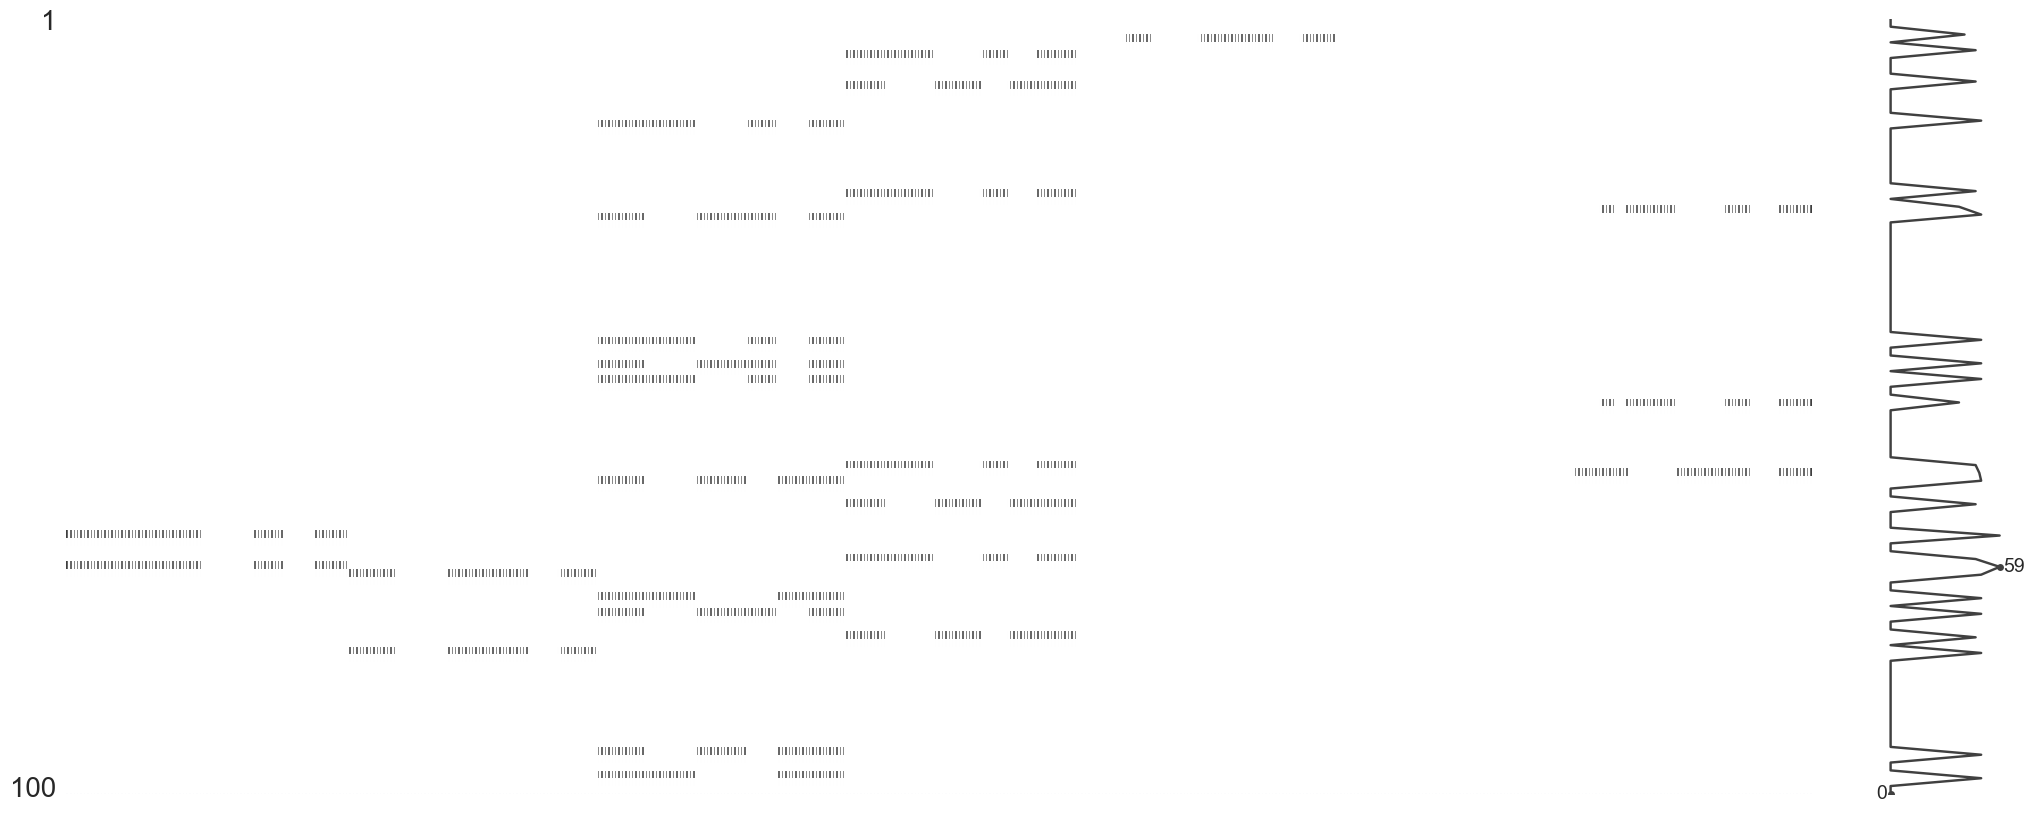

In [102]:
# L1: all the features (S24 - S25)
msno.matrix(numeric.loc[:,'L1_S24_F679':'L1_S25_F3034'].sample(100))

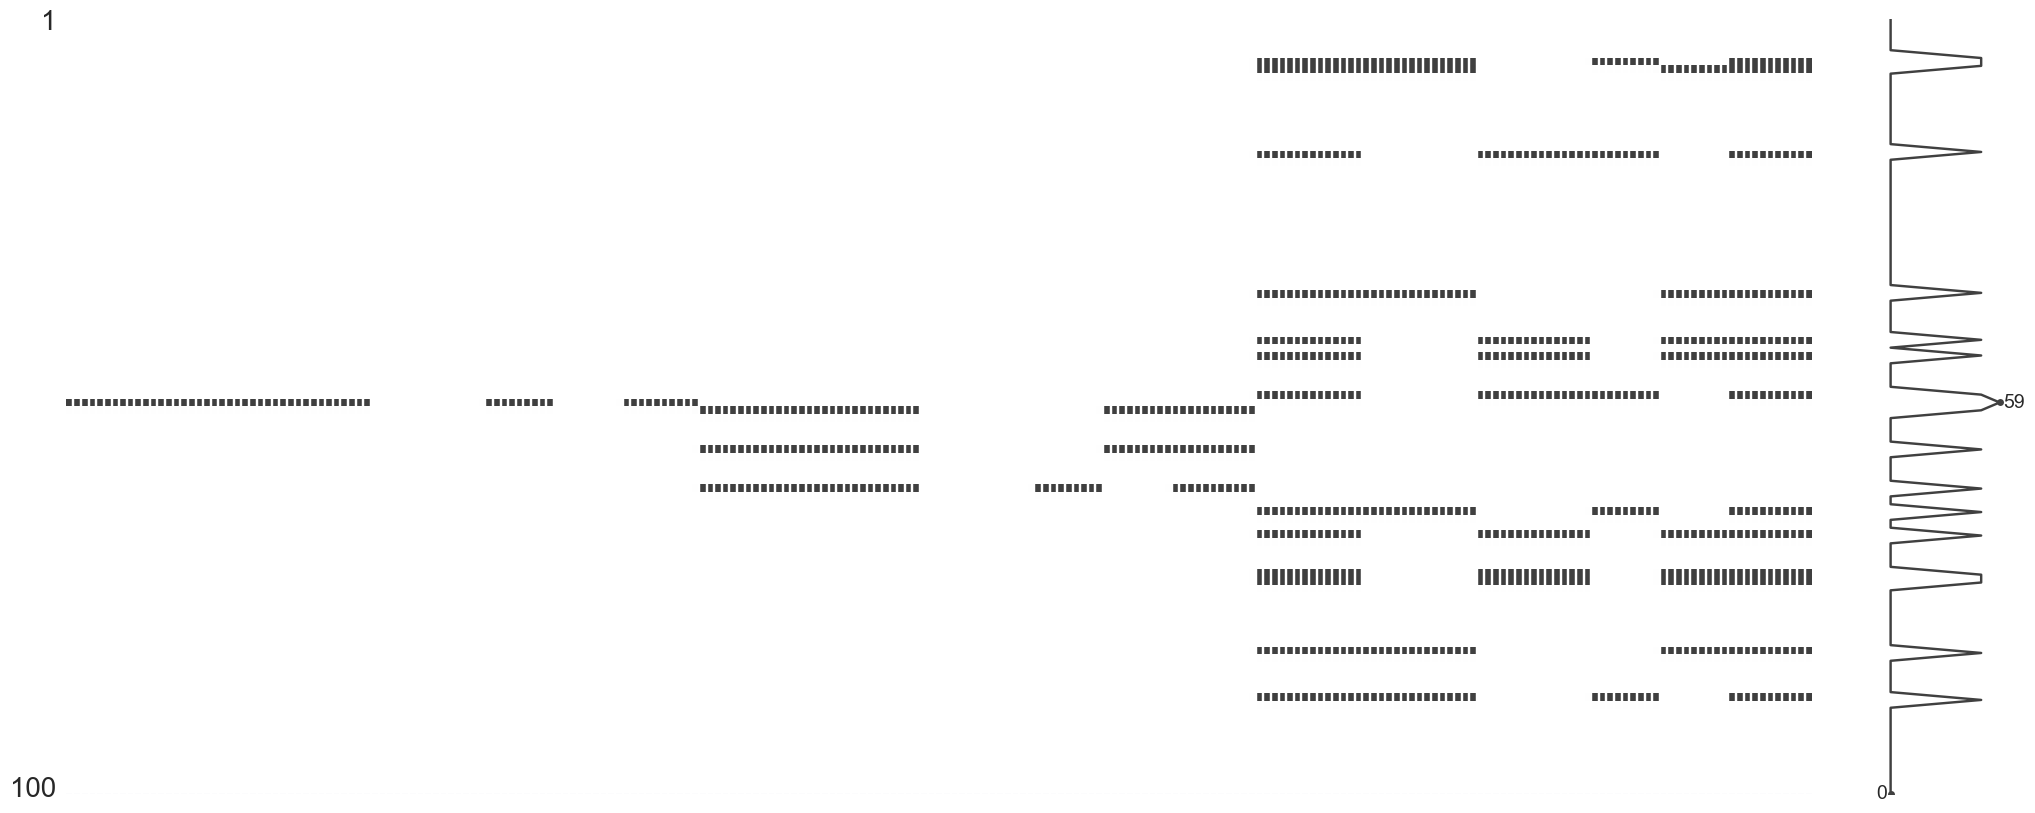

In [75]:
# L1: S24
msno.matrix(numeric.loc[:,'L1_S24_F679':'L1_S24_F1850'].sample(100))

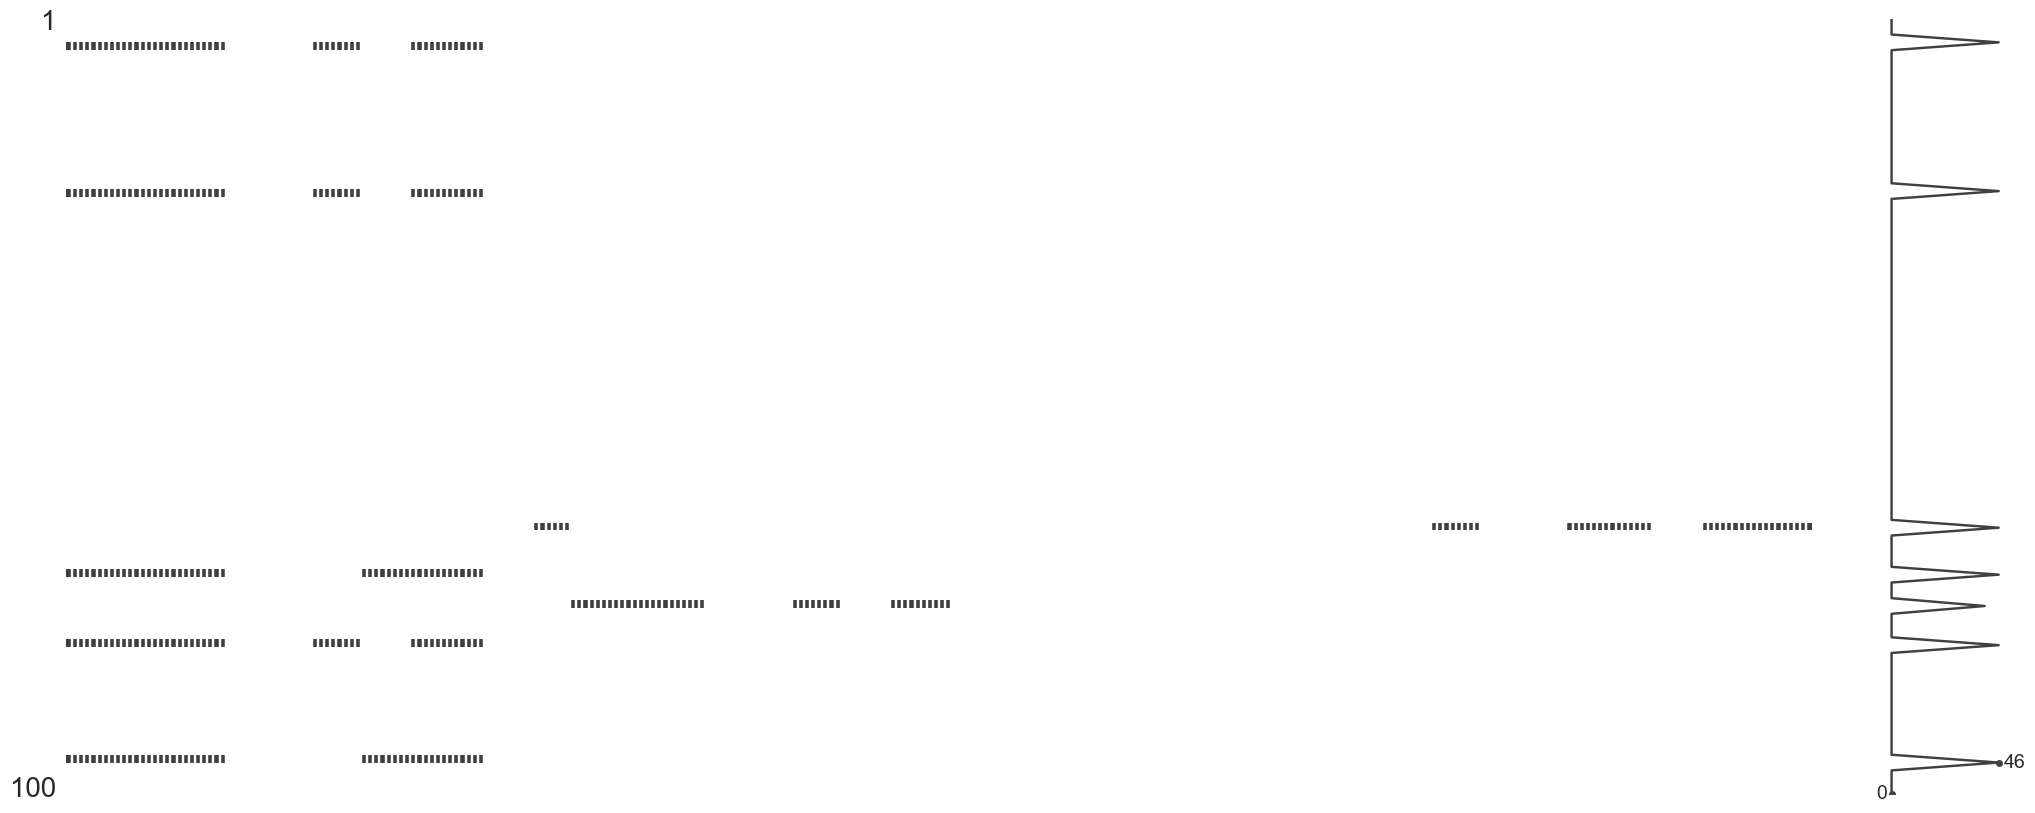

In [100]:
# L1: S25
msno.matrix(numeric.loc[:,'L1_S25_F1855':'L1_S25_F3034'].sample(100))

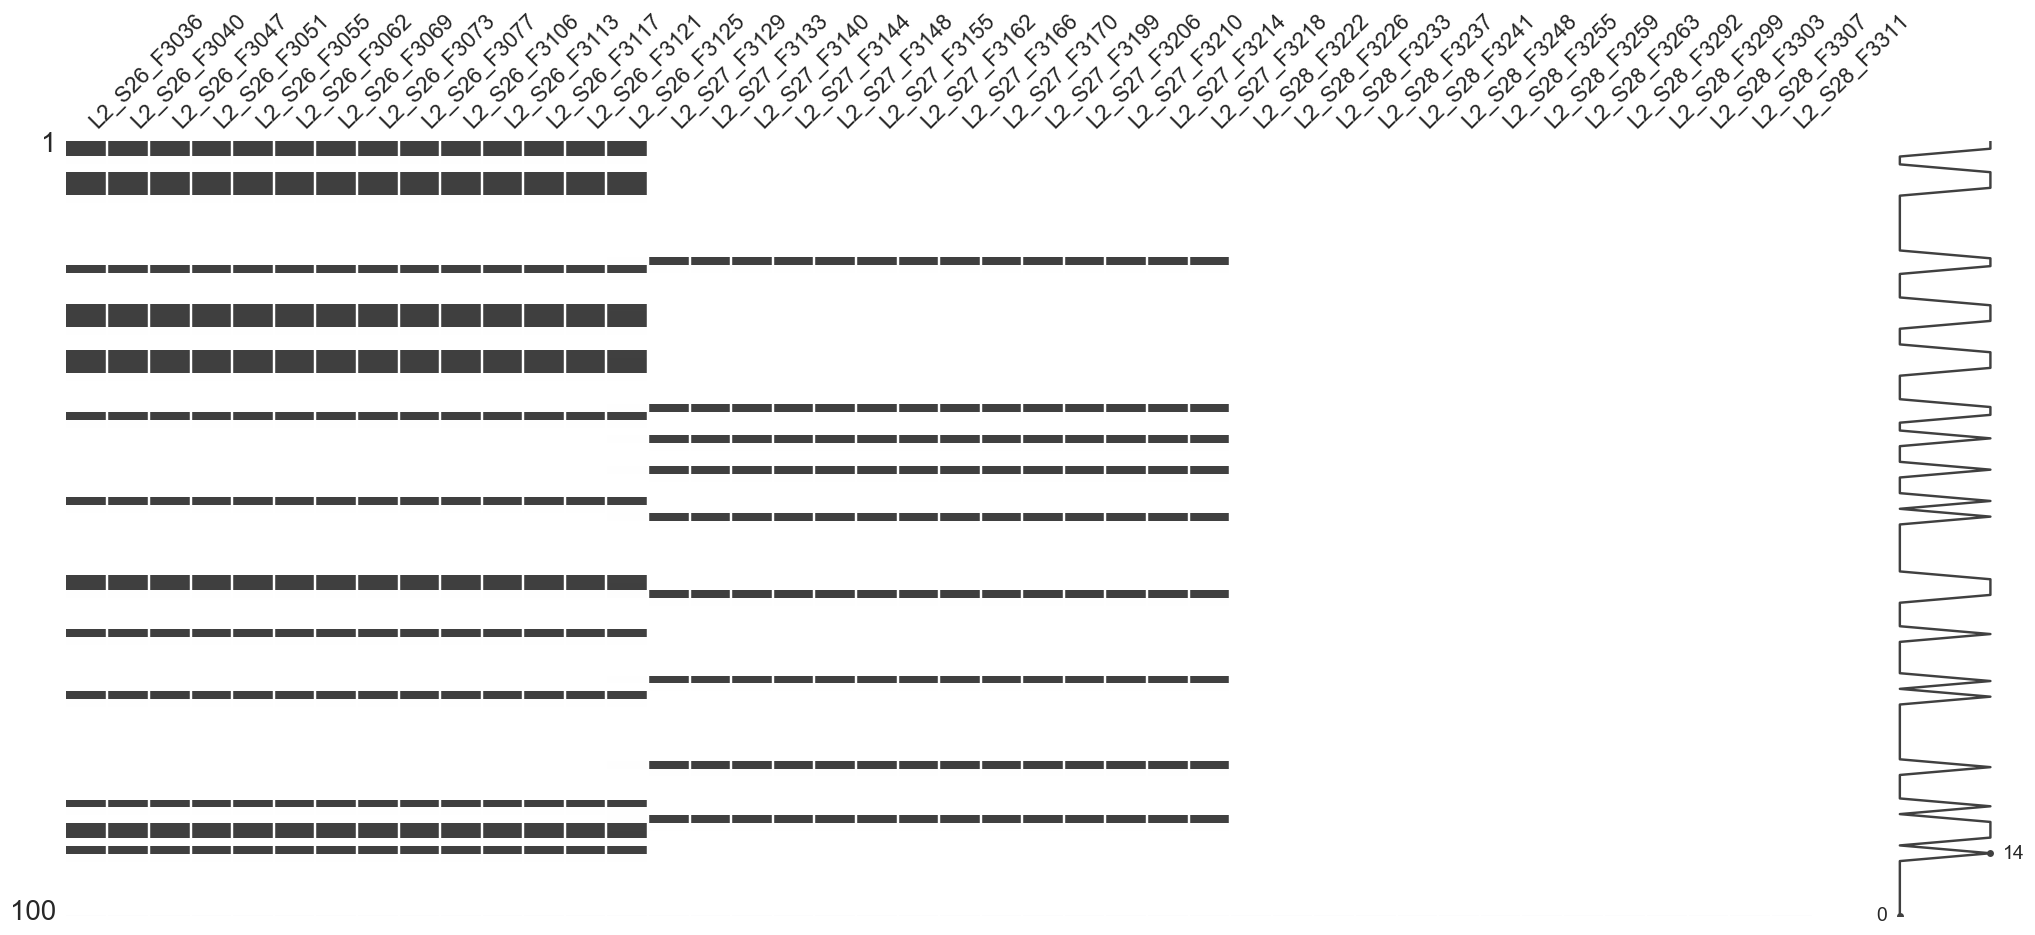

In [98]:
# L2: S26-S28
msno.matrix(numeric.loc[:,'L2_S26_F3036':'L2_S28_F3311'].sample(100))

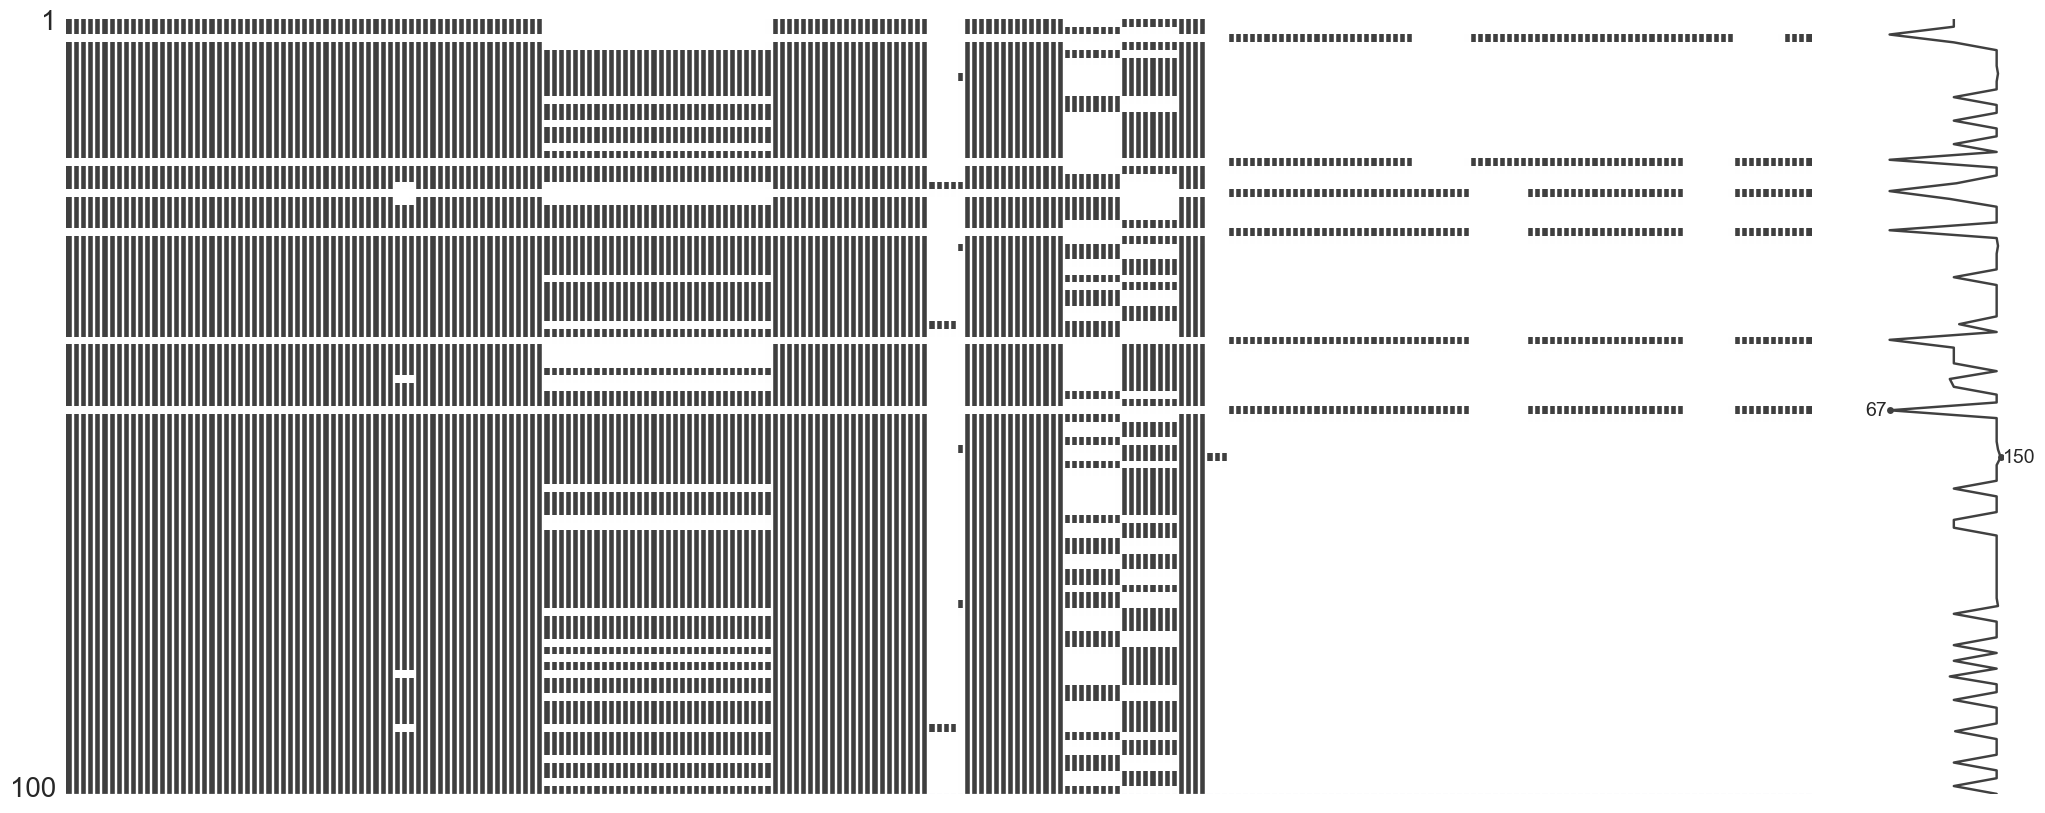

In [52]:
# L3 - all the features (S29 - S51 (no stations S42, S46))
msno.matrix(numeric.loc[:,'L3_S29_F3315':'L3_S51_F4262'].sample(100))
#msno.matrix(numeric.loc[:,['L3_S29_F3315','L3_S51_F4262'].iloc[1:100])

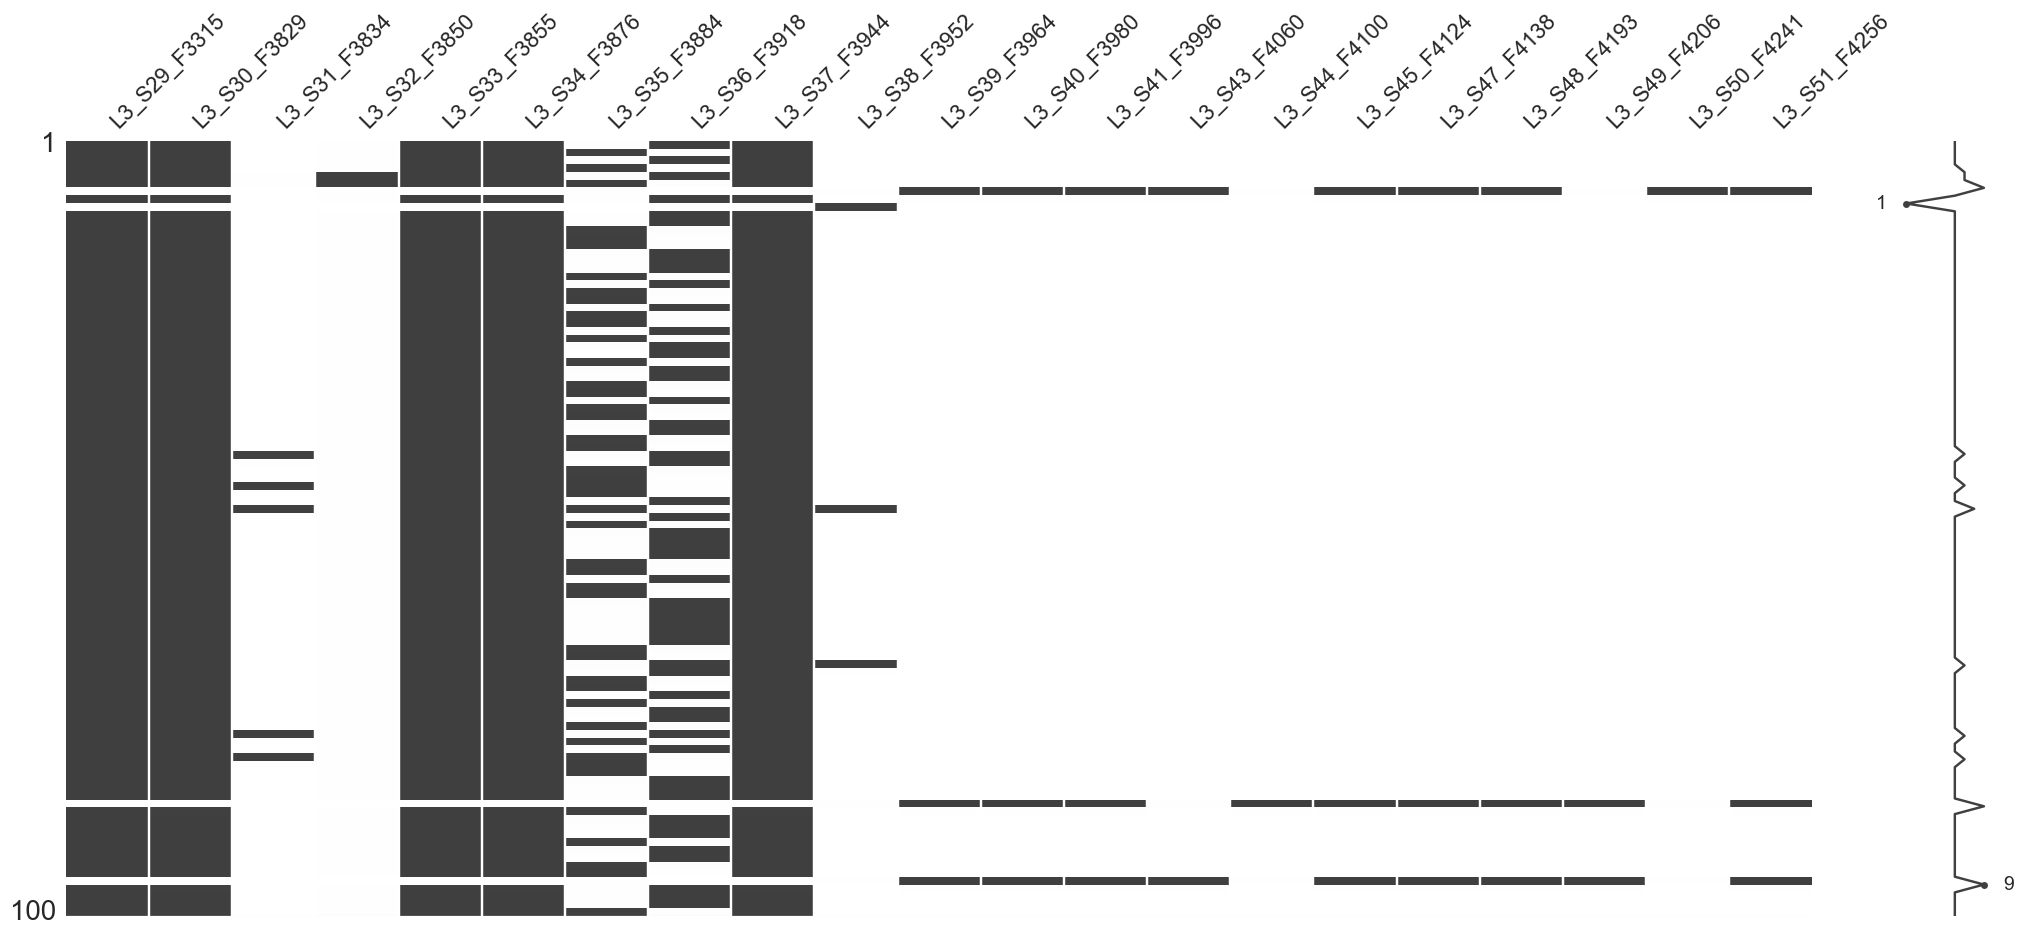

In [81]:
# L3 - first features by station
msno.matrix(numeric.loc[:,['L3_S29_F3315','L3_S30_F3829','L3_S31_F3834','L3_S32_F3850','L3_S33_F3855','L3_S34_F3876',
                           'L3_S35_F3884','L3_S36_F3918','L3_S37_F3944','L3_S38_F3952','L3_S39_F3964','L3_S40_F3980',
                          'L3_S41_F3996','L3_S43_F4060','L3_S44_F4100','L3_S45_F4124','L3_S47_F4138','L3_S48_F4193',
                          'L3_S49_F4206','L3_S50_F4241','L3_S51_F4256']].sample(100))

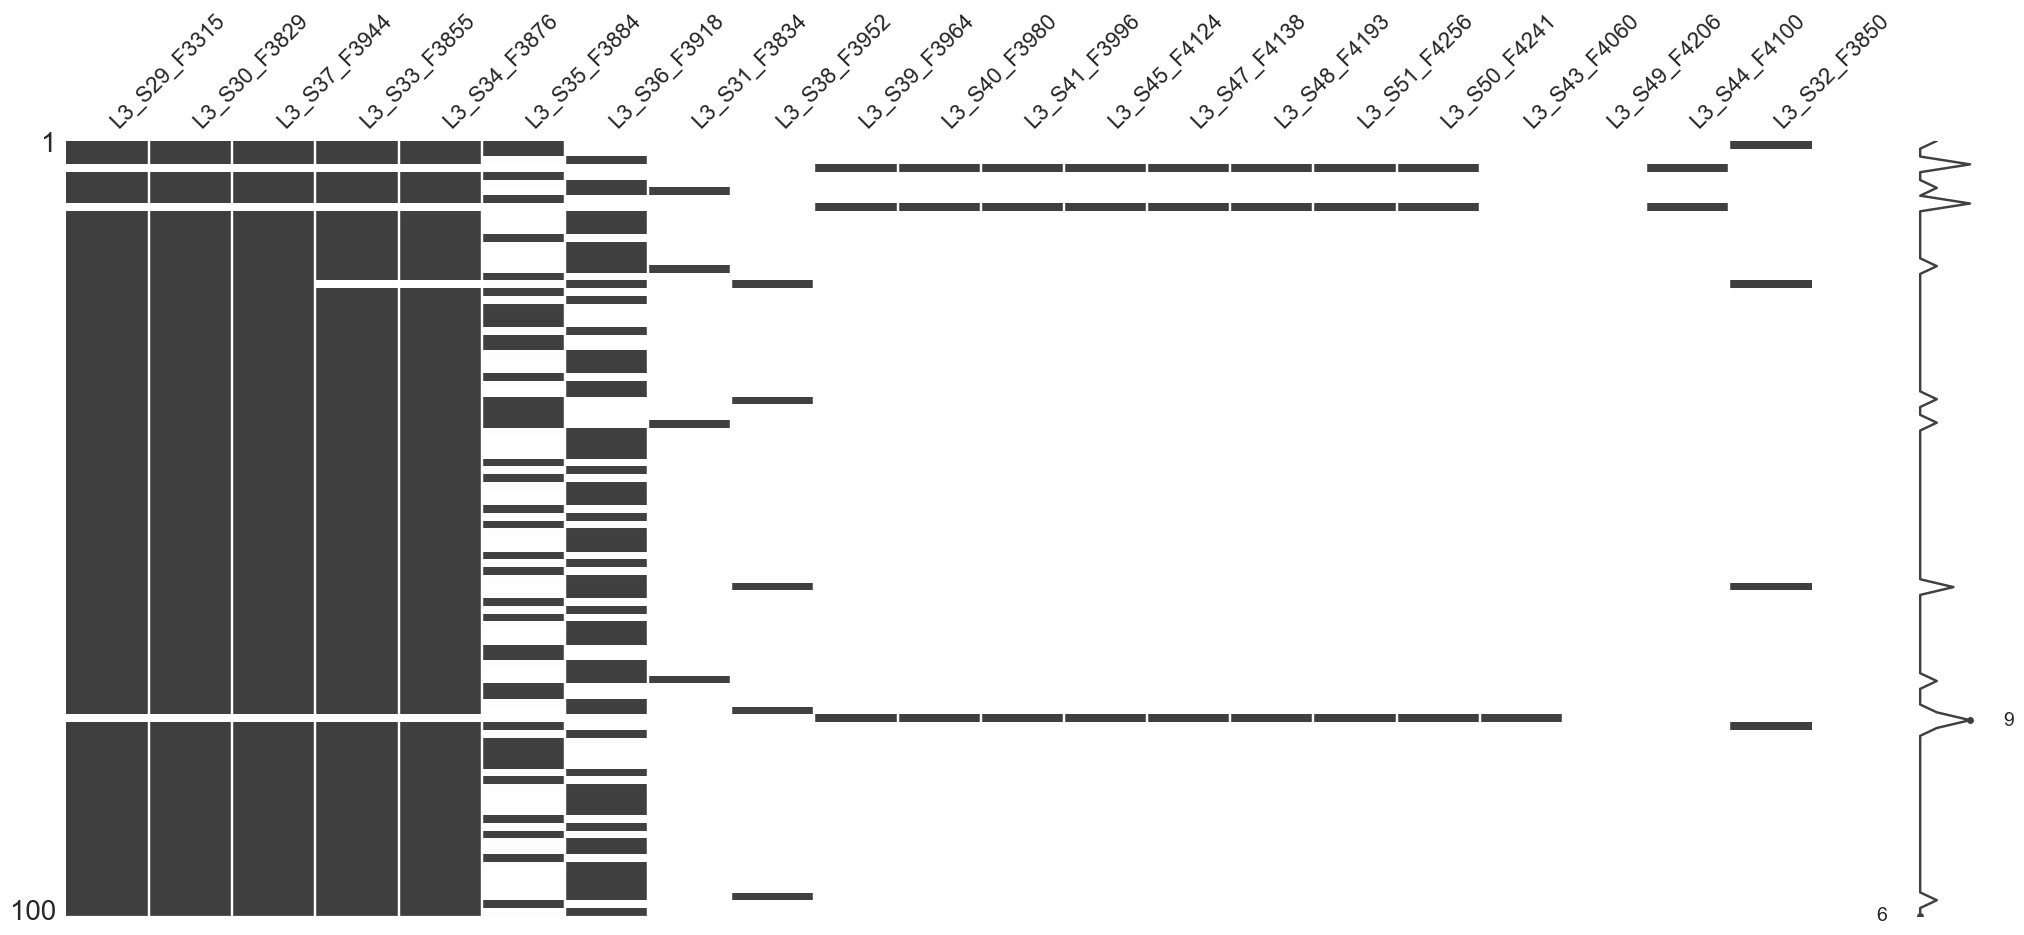

In [112]:
# L3 - first features by station (aligned)
msno.matrix(numeric.loc[:,['L3_S29_F3315','L3_S30_F3829','L3_S37_F3944','L3_S33_F3855','L3_S34_F3876',
                           'L3_S35_F3884','L3_S36_F3918','L3_S31_F3834','L3_S38_F3952','L3_S39_F3964','L3_S40_F3980',
                          'L3_S41_F3996','L3_S45_F4124','L3_S47_F4138','L3_S48_F4193','L3_S51_F4256',
                          'L3_S50_F4241','L3_S43_F4060','L3_S49_F4206','L3_S44_F4100','L3_S32_F3850']].sample(100))

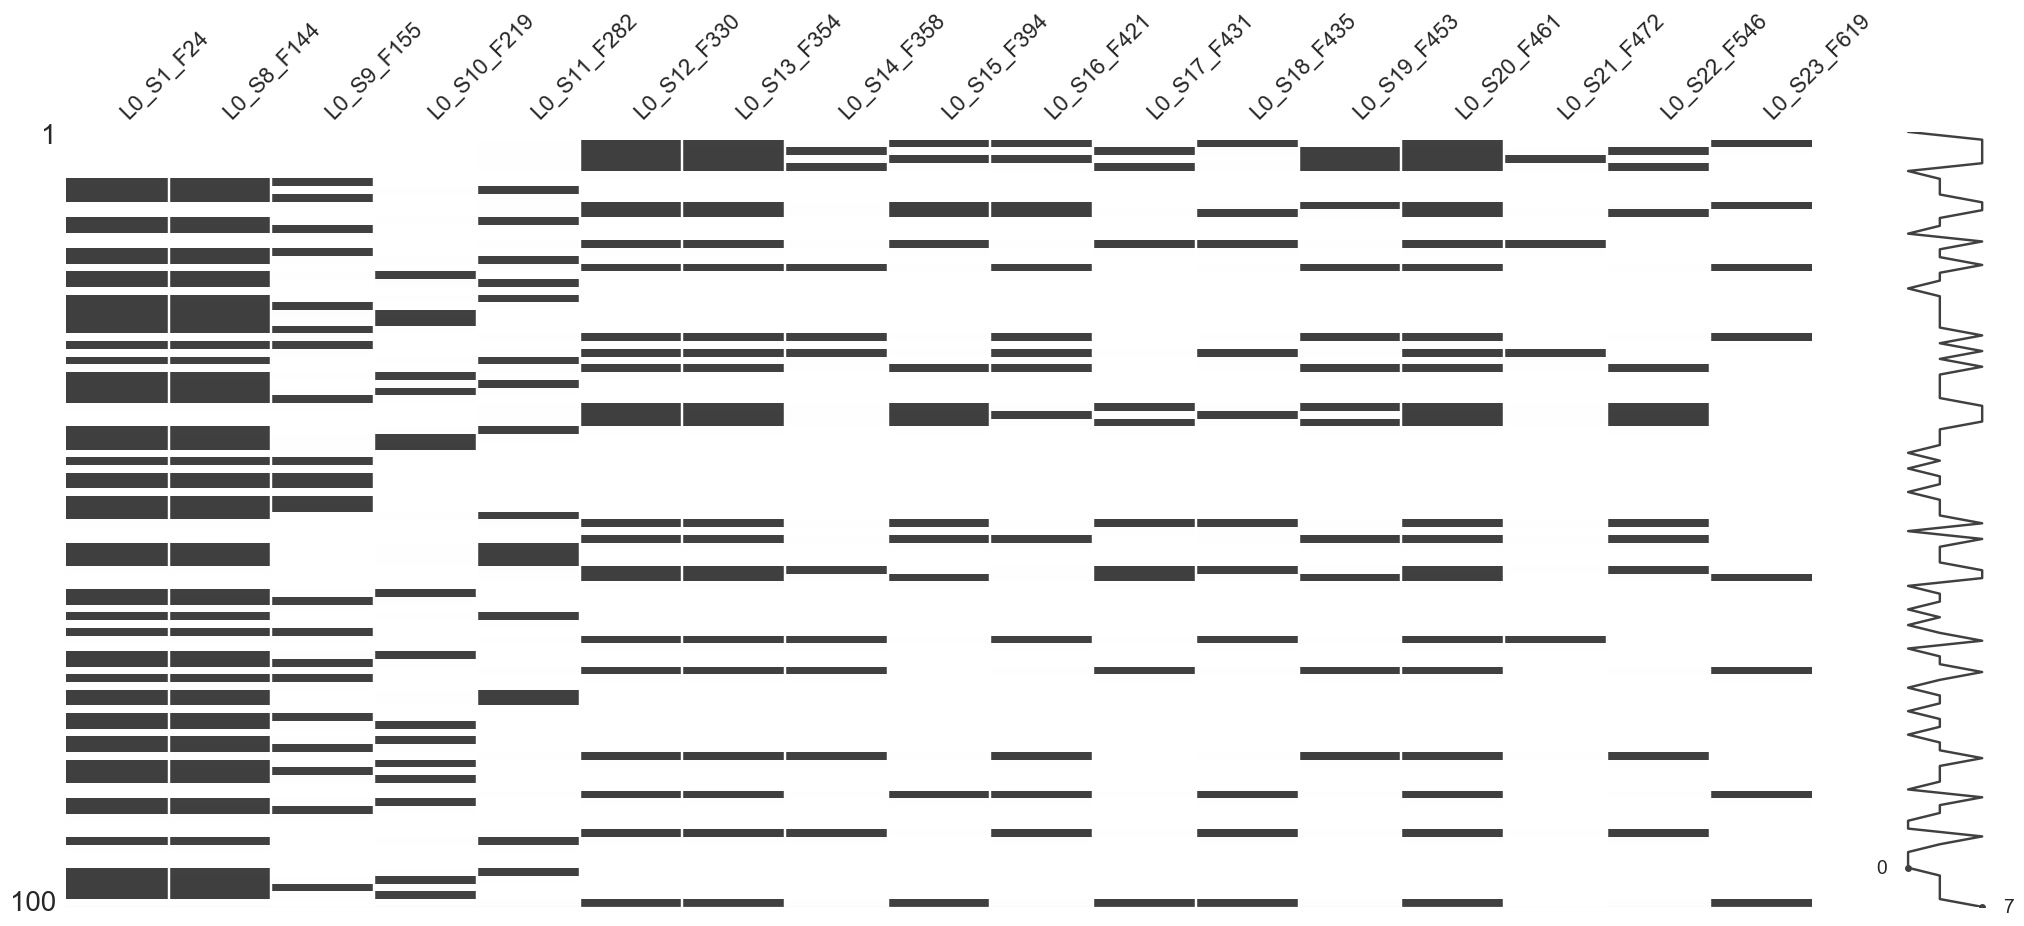

In [67]:
msno.matrix(numeric.loc[:,['L0_S1_F24','L0_S8_F144','L0_S9_F155','L0_S10_F219','L0_S11_F282', 'L0_S12_F330','L0_S13_F354','L0_S14_F358'
                          ,'L0_S15_F394','L0_S16_F421','L0_S17_F431','L0_S18_F435','L0_S19_F453','L0_S20_F461','L0_S21_F472'
                          ,'L0_S22_F546','L0_S23_F619']].sample(100))

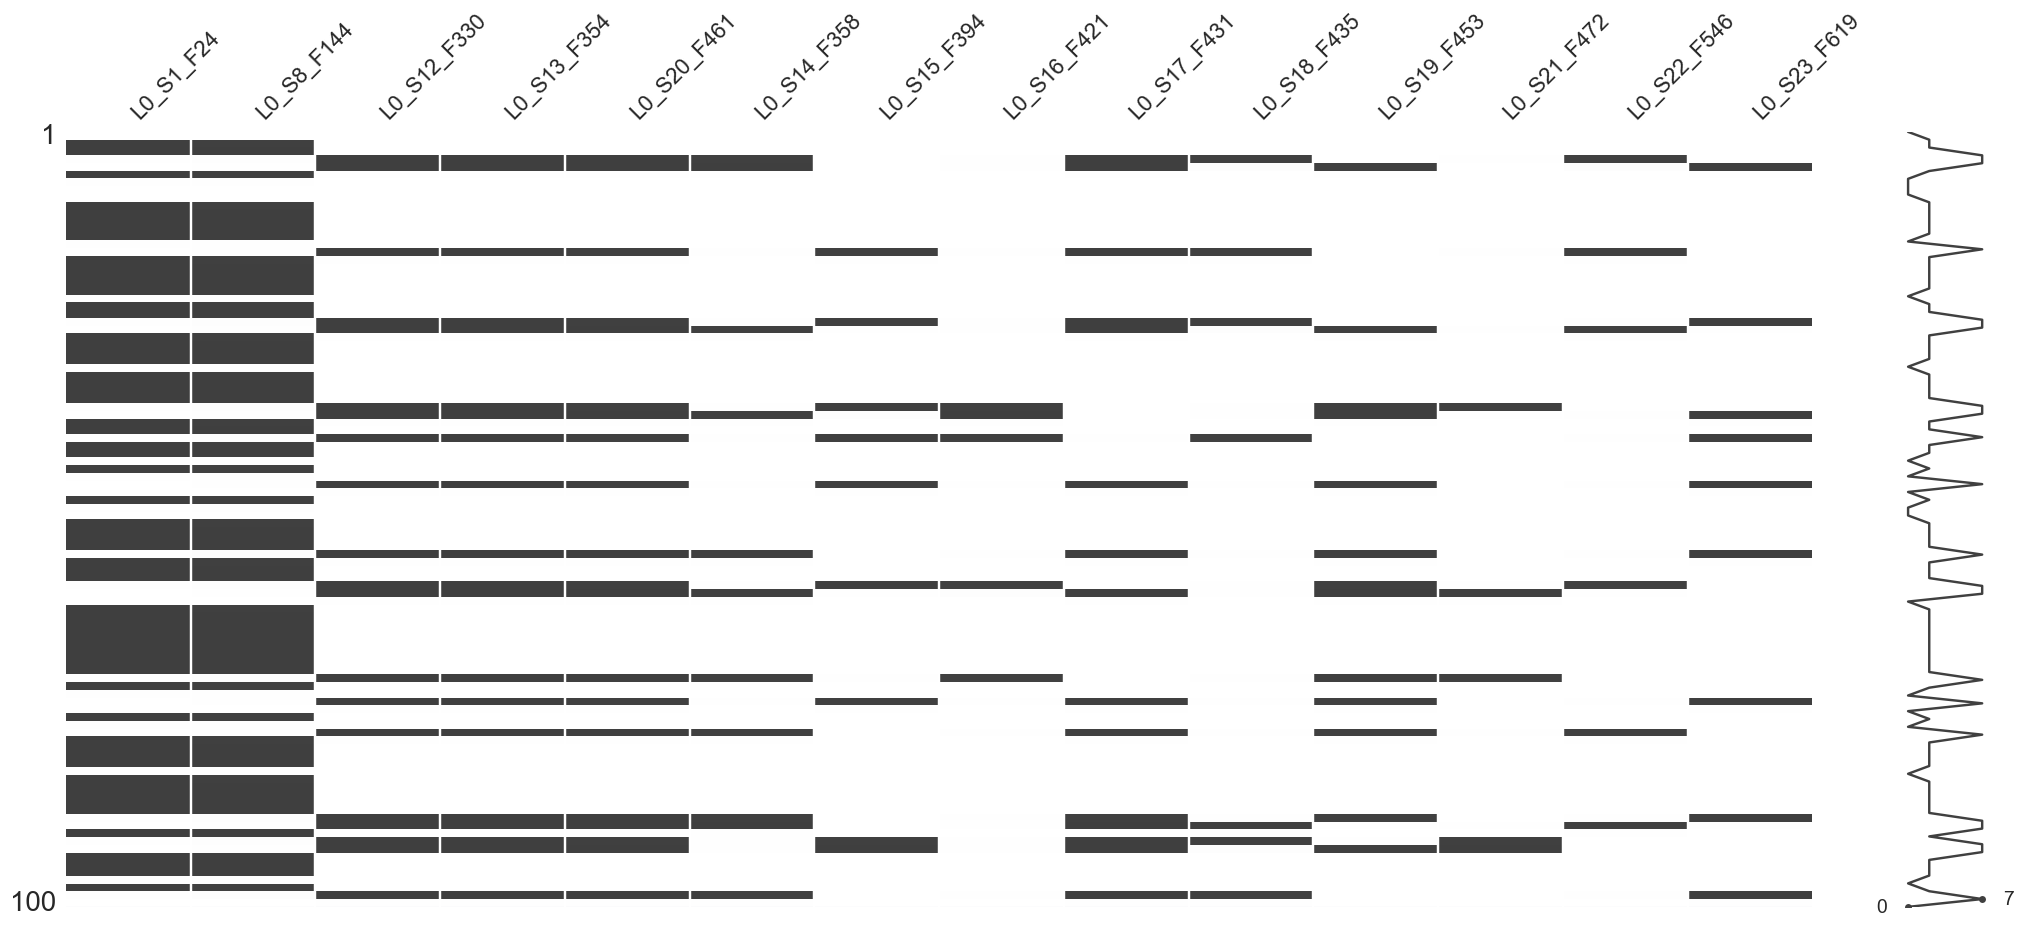

In [70]:
msno.matrix(numeric.loc[:,['L0_S1_F24','L0_S8_F144','L0_S12_F330','L0_S13_F354','L0_S20_F461','L0_S14_F358'
                          ,'L0_S15_F394','L0_S16_F421','L0_S17_F431','L0_S18_F435','L0_S19_F453','L0_S21_F472'
                          ,'L0_S22_F546','L0_S23_F619']].sample(100))

In [127]:
missing_group = missing.groupby('missing_num').first()
missing_group = missing_group.reset_index('features')

missing_group = missing_group.groupby('features').first()
missing_group = missing_group.reset_index('features')
missing_group

,features,missing_num,missing_rate
0,L0_S0_F0,5.098850e+05,0.430738
1,L0_S10_F219,9.592240e+05,0.810329
2,L0_S10_F224,9.592070e+05,0.810314
3,L0_S10_F229,9.592200e+05,0.810325
4,L0_S11_F282,9.582950e+05,0.809544
5,L0_S12_F330,9.416860e+05,0.795513
6,L0_S13_F354,9.416820e+05,0.795510
7,L0_S14_F358,1.063122e+06,0.898099
8,L0_S15_F394,1.062302e+06,0.897406
9,L0_S16_F421,1.064608e+06,0.899354


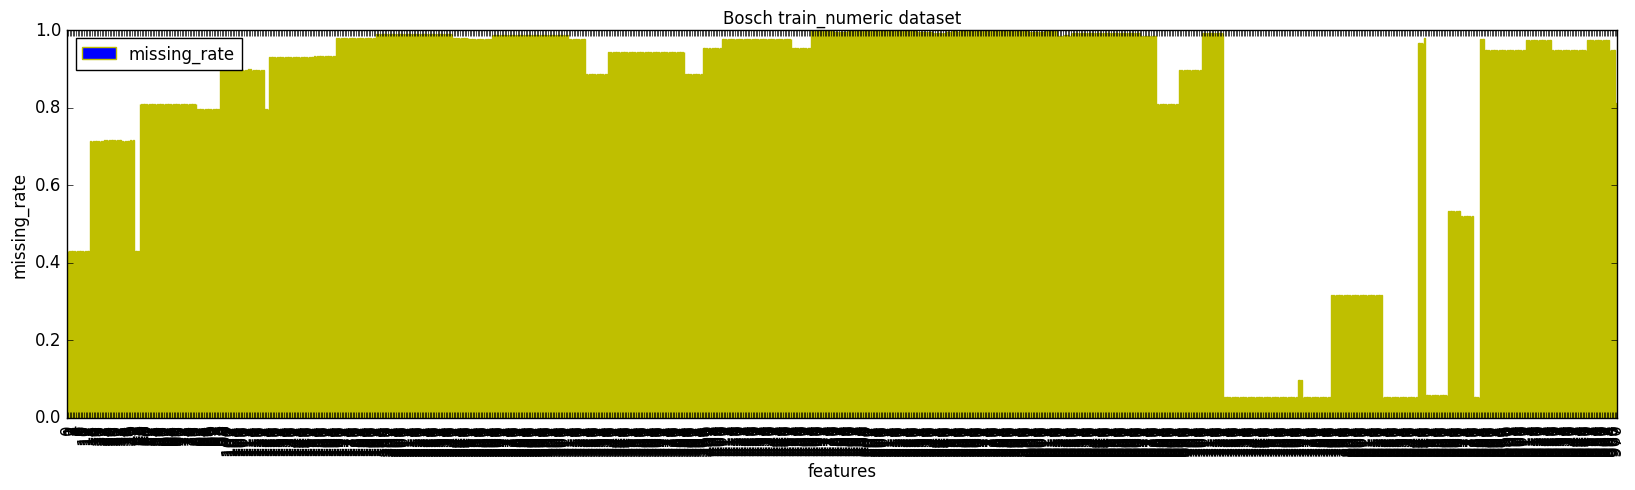

In [140]:
import matplotlib.pyplot as plt
#ax = missing_group[['features','missing_rate']].plot(kind='dot', title ="Bosch train_numeric dataset", figsize=(20, 10), legend=True, fontsize=12)
ax = missing[['features','missing_rate']].plot(kind='bar', edgecolor='y', title ="Bosch train_numeric dataset", width=0.5, figsize=(20, 5), legend=True, fontsize=12)

ax.set_xlabel("features", fontsize=12)
ax.set_ylabel("missing_rate", fontsize=12)
plt.show()

SyntaxError: invalid syntax (<ipython-input-85-a9dfdaf71254>, line 1)

In [82]:
 missing.plot(kind='bar'); plt.axhline(0, color='k')

In [69]:
missing.to_csv('data/train_numeric_missing.csv', index=False)